<div style="background-color:red; height: 3em">

</div>


# Important information

## The notebook is split into, getting `ticker_symbol`, `downloading data` and `first aggregations` 

### you should be able to use each section seperate, but there are requirements for the sections
### the requirements dont add up, so if you have a ticker_symbol list you never need the three wikidata.csv files

- requirments for block `gather ticker_symbol`
- - have the csv files:
- - - wikidata_ticker_symbol_data.csv
- - - wikilist_1.csv
- - - wikilist_2.csv

---> creates ticker_symbols

- requirments for block `downloading`
- - have a list of ticker_symbols

---> creates raw_data

- requirments for block `first aggregation`
- - have the `raw_data` downloaded

---> creates first aggregations


### If you only want to download new data you have to start on the block `downloading`!



<div style="background-color:red; height: 3em">

</div>


<div style="background-color:red; height: 3em">

</div>

# Block description: `Gather Tickersymbols`

### gathering tickersymbols like `APPL` or `T` for all companies in the S&P index

<div style="background-color:red; height: 3em">

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import time
import json
import requests
from pandas.io.json import json_normalize
import csv

In [2]:
# open wikidata_ticker_symbol_data.csv
# read the csv file into a dataframe

symbol_df = pd.read_csv('./data/companies/wikidata_ticker_symbol_data.csv')
list_df_1 = pd.read_csv('./data/companies/wikilist_1.csv', encoding='latin-1')
list_df_2 = pd.read_csv('./data/companies/wikilist_2.csv', encoding='latin-1')

In [3]:
list_df_2

,Date,Added,Added.1,Removed,Removed.1,Reason
0,Date,Ticker,Security,Ticker,Security,Reason
1,"October 3, 2023",NaN,NaN,DXC,DXC Technology,Market capitalization change.
2,"October 2, 2023",VLTO,Veralto,NaN,NaN,S&P 500 and S&P 100 constituent Danaher Corpor...
3,"September 18, 2023",BX,Blackstone,LNC,Lincoln National Corp,Market capitalization change.
4,"September 18, 2023",ABNB,Airbnb,NWL,Newell Brands Inc,Market capitalization change.
...,...,...,...,...,...,...
328,"June 9, 1999",WLP,Wellpoint,HPH,Harnischfeger Industries,Harnischfeger filed for bankruptcy.
329,"December 11, 1998",FSR,Firstar,LDW,Amoco,British Petroleum purchased Amoco.
330,"December 11, 1998",CCL,Carnival Corp.,GRN,General Re,Berkshire Hathaway purchased General Re.
331,"December 11, 1998",CPWR,Compuware,SUN,SunAmerica,AIG purchased SunAmerica.


In [4]:
len(symbol_df["tickerSymbol"].unique())
# check which companies are missing in the wikidata_ticker_symbol_data.csv 
result_list = []
result_list.extend(symbol_df["tickerSymbol"].to_list())

list_of_ticker_symbols_1 = list_df_1["Symbol"].unique()
missing_ticker_symbols = []
for symbol in list_of_ticker_symbols_1:
    if symbol not in symbol_df["tickerSymbol"].unique():
        missing_ticker_symbols.append({"symbol":symbol, "list":"first"})
        result_list.append(symbol)

list_of_ticker_symbols_2 = list_df_2["Removed"].unique()
for symbol in list_of_ticker_symbols_2:
    if symbol not in symbol_df["tickerSymbol"].unique():
        missing_ticker_symbols.append({"symbol":symbol, "list":"second"})
        result_list.append(symbol)


In [5]:
missing_ticker_symbols
len(set(result_list))

859

In [6]:
import requests

# get secret key from secret_file.json
secret_key = None
with open('secret_file.json') as f:
    secret_key_fmp = json.load(f)["secret_key_fmp"]




<div style="background-color:red; height: 3em">

</div>

# Block descirption:  `download`
## here you are going to start the download, this takes a while because you have to be nice to the api of finance modeling


<div style="background-color:red; height: 3em">

</div>


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import time
import json
import requests
from pandas.io.json import json_normalize
import csv

In [8]:
import requests

# get secret key from secret_file.json
secret_key = None
with open('secret_file.json') as f:
    secret_key_fmp = json.load(f)["secret_key_fmp"]
is_valid = False

# validate api key
url = f"https://financialmodelingprep.com/api/v3/historical/sp500_constituent?apikey={secret_key_fmp}"
response = requests.get(url)
if(response.status_code == 200):
    print("API key is valid")
    is_valid = True
else:
    is_valid = False
    print("API key has not the right privileges and is invalid")


API key has not the right privileges and is invalid


In [9]:
# Prompt the user for their choice
choice = input("Choose a solution (fmprep/read_csv/already_done): ")

if choice == "fmprep" and is_valid:
    
    # not sure if its working at the moment
    # fmprep solution

    fmprep_sp500 = f"https://financialmodelingprep.com/api/v3/historical/sp500_constituent?apikey={secret_key_fmp}"
    r = requests.get(fmprep_sp500)
    data = r.json()
    result_list = data["symbol"]
    if(len(result_list) > 505):
        print("successfully read csv file")
    

elif choice == "read_csv":
    # read_csv solution
    sp500 = pd.read_csv('./data/companies/s&p_companies_ticker_name.csv')
    
    result_list = sp500
    result_list = result_list["0"].to_list()
    if(len(result_list) > 505):
        print("successfully read csv file")
    

elif choice == "already_done":
    # data generate from code above
    result_list = result_list
    if(len(result_list) > 505):
        print("successfully from code above")

else:
    print("Invalid choice. Please choose either 'fmprep', 'already_done' or 'read_csv'. \nIMPORTANT NOTE: If you choose 'fmprep' you need to have a valid API key.")


successfully read csv file


In [10]:
raw_data_dividend = []
for index, x in enumerate(result_list):
    url = f'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{ x }?apikey={secret_key_fmp}'
    # !!!!!!carefull don't print url and commit!!!!!!!!
    if(index % 50 == 0):
        print(index)
    r = requests.get(url)
    data = r.json()
    raw_data_dividend.append(data)
    # save to file every time because i dont want to lose data
    with open('./data/stock_infos/raw_data_fmp.json', 'w') as outfile:
        json.dump(raw_data_dividend, outfile)
    time.sleep(1)

0


KeyboardInterrupt: 

In [20]:
raw_data_stocks= []
for index, x in enumerate(result_list):
    url = f'https://financialmodelingprep.com/api/v3/historical-pricel-full/1month/{ x }?apikey={secret_key_fmp}'
    # !!!!!!carefull don't print url and commit!!!!!!!!
    if(index % 50 == 0):
        print(index)
    r = requests.get(url)
    data = r.json()
    raw_data_stocks.append({"data":data, "symbol":x})
    # save to file every time because i dont want to lose data
    with open('./data/stock_infos/raw_data_fmp_stock_value.json', 'w') as outfile:
        json.dump(raw_data_stocks, outfile)
    
    if(type(data) != list):
        # if data is not a list then it is an error
        break
    time.sleep(1)

0
50
100
150
200


<div style="background-color:red; height: 3em">

</div>

# Block description: `First Aggregations`

# We use time aggregation to see if the data is downloaded correct and is easy to use


<div style="background-color:red; height: 3em">

</div>


<div style="background-color:red; height: 3em">

</div>

# Block description: Dividend


<div style="background-color:red; height: 3em">

</div>


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import time
import json
import requests
from pandas.io.json import json_normalize
import csv

In [43]:
raw_data = []
with open('./data/stock_infos/raw_data_fmp.json', "r") as json_file:
    raw_data = json.load(json_file)

raw_data[1].keys()



pd.json_normalize(raw_data[0]["historical"]).keys()

df = pd.DataFrame(pd.json_normalize(raw_data[0]["historical"]))
df["date"] = pd.to_datetime(df["date"])

df.groupby([df.date.dt.month, 'adjDividend', 'dividend', "recordDate", "paymentDate", "declarationDate"]).sum()

C:\Users\Bene\AppData\Local\Temp/ipykernel_8064/1251686202.py:14: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df.groupby([df.date.dt.month, 'adjDividend', 'dividend', "recordDate", "paymentDate", "declarationDate"]).sum()


label
date adjDividend dividend recordDate paymentDate declarationDate                 
1    0.000250    0.0040   1991-01-15 1991-01-29                    January 09, 91
     0.003125    0.0500   1990-01-12 1990-01-26  1990-01-04        January 08, 90
     0.005000    0.0800   1992-01-15 1992-01-29                    January 09, 92
                          1993-01-25 1993-02-09                    January 19, 93
     0.006250    0.0500   1994-01-27 1994-02-10                    January 21, 94
...                                                                           ...
12   0.002250    0.0180   1998-01-02 1998-01-16  1997-12-18       December 30, 97
     0.006250    0.0250   1999-12-28 2000-01-11  1999-12-17       December 23, 99
                 0.0500   1998-12-28 1999-01-11  1998-12-14       December 23, 98
     0.006500    0.0125   2002-01-03 2002-01-17  2001-12-24       December 31, 01
                          2004-12-28 2005-01-11  2004-12-15       December 23, 04

[63 rows x 1 columns]

In [44]:
from datetime import datetime, timedelta

# Starting date (January 1, 1970)
start_date = datetime(1970, 1, 1)

# Number of months to generate
num_months = (datetime.now() - start_date).days // 30

# Generate datetime objects for each month
months = [start_date + timedelta(days=30 * i) for i in range(num_months)]


In [45]:
result_df = pd.DataFrame()


result_df["date"] = pd.to_datetime(months).to_period('M')



for i, x in enumerate(raw_data):
    
    try:

    # unpivot json
        df = pd.json_normalize(x['historical'])
    except:
        print(x)
        continue
    
    if(df.empty):
        continue
    

    
    df['orignal_date'] = pd.to_datetime(df['date'])
    # df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

    df['date'] = df['orignal_date'].dt.to_period('M')
        
    df_melted = df.melt(id_vars=['date'], value_vars=['adjDividend', 'dividend', "recordDate", "paymentDate", "declarationDate"])
    print(x['symbol'])
    # rename value column to json_response_2['symbol']
    # df_melted = df_melted.rename(columns={"value": x['symbol']})
    # join result df with df_melted on date
    df_melted["symbol"] = x["symbol"]



    if(i == 0):
        result_df = df_melted
        continue
    
    result_df = pd.concat([result_df, df_melted])

    # result_df = result_df.merge(df_melted, how='left', on='date')
    
    



ADBE
T
CSCO
GS
AIG
NOC
MSFT
BA
AFL
IBM
PNC
SHW
DG
KR
EQR
PG
COP
C
V
ORCL
ORCL
IT
AAPL
TTWO
EA
NVDA
DAL
TXN
GME
IP
VIAB
VIA
DD
BMY
AES
DIS
MCD
ALB
AMD
AMD
UNM
JPM
ZION
BLK
CVX
LMT
PPG
ETN
XOM
ZBH
ZBH
PFE
MRK
JNJ
INTC
F
GE
EBAY
GM
CMI
AXP
SBUX
APA
XRX
UPS
MMM
ABT
WMT
IVZ
BBY
PDCO
QCOM
AMAT
CI
MCO
HBAN
L
APH
DE
HAS
CE
MCK
MET
LLY
MDT
USB
WAB
BBT
TFC
LUV
CVS
GIS
MSI
APTV
DLPH
TMO
JCI
AON
DPZ
GD
MGM
STX
WFC
MSCI
AVY
MA
GRA
HAL
NWL
SWK
BEN
BAX
BBWI
BDX
NKE
NLSN
CL
ELV
LIN
LIN
CARR
BKR
BWA
ADI
ADP
LDOS
BK
KLAC
ADM
TEL
D
COST
VRSN
EQIX
WU
BAC
EIX
GILD
YUM
NLOK
NTAP
WDC
DRI
ICE
K
IR
PEG
CBS
TGT
MAR
EOG
NSC
LB
CERN
DHR
DISH
EL
FITB
FLS
MCHP
HCA
HST
NUE
PAYX
CDW
CME
HLT
PSA
DVN
ECL
EMR
LRCX
LOW
MRO
RL
CMCSA
{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://site.financialmodelingprep.com/'}
{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://site.financialmodelingprep.com/'}


In [46]:
result_df = pd.DataFrame()


result_df["date"] = pd.to_datetime(months).to_period('M')



for i, x in enumerate(raw_data):
    
    try:

    # unpivot json
        df = pd.json_normalize(x['historical'])
    except:
        print(x)
        continue
    
    if(df.empty):
        continue
    

    
    df['orignal_date'] = pd.to_datetime(df['date'])
    # df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

    df['date'] = df['orignal_date'].dt.to_period('M')
        
    df_melted = df.melt(id_vars=['date'], value_vars=['adjDividend', 'dividend', "recordDate", "paymentDate", "declarationDate"])
    print(x['symbol'])
    # rename value column to json_response_2['symbol']
    # df_melted = df_melted.rename(columns={"value": x['symbol']})
    # join result df with df_melted on date
    df_melted["symbol"] = x["symbol"]



    if(i == 0):
        result_df = df_melted
        continue
    
    result_df = pd.concat([result_df, df_melted])

    # result_df = result_df.merge(df_melted, how='left', on='date')
    
    



ADBE
T
CSCO
GS
AIG
NOC
MSFT
BA
AFL
IBM
PNC
SHW
DG
KR
EQR
PG
COP
C
V
ORCL
ORCL
IT
AAPL
TTWO
EA
NVDA
DAL
TXN
GME
IP
VIAB
VIA
DD
BMY
AES
DIS
MCD
ALB
AMD
AMD
UNM
JPM
ZION
BLK
CVX
LMT
PPG
ETN
XOM
ZBH
ZBH
PFE
MRK
JNJ
INTC
F
GE
EBAY
GM
CMI
AXP
SBUX
APA
XRX
UPS
MMM
ABT
WMT
IVZ
BBY
PDCO
QCOM
AMAT
CI
MCO
HBAN
L
APH
DE
HAS
CE
MCK
MET
LLY
MDT
USB
WAB
BBT
TFC
LUV
CVS
GIS
MSI
APTV
DLPH
TMO
JCI
AON
DPZ
GD
MGM
STX
WFC
MSCI
AVY
MA
GRA
HAL
NWL
SWK
BEN
BAX
BBWI
BDX
NKE
NLSN
CL
ELV
LIN
LIN
CARR
BKR
BWA
ADI
ADP
LDOS
BK
KLAC
ADM
TEL
D
COST
VRSN
EQIX
WU
BAC
EIX
GILD
YUM
NLOK
NTAP
WDC
DRI
ICE
K
IR
PEG
CBS
TGT
MAR
EOG
NSC
LB
CERN
DHR
DISH
EL
FITB
FLS
MCHP
HCA
HST
NUE
PAYX
CDW
CME
HLT
PSA
DVN
ECL
EMR
LRCX
LOW
MRO
RL
CMCSA
{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://site.financialmodelingprep.com/'}
{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://site.financialmodelingprep.com/'}


In [47]:
result_df[(result_df["variable"] == "adjDividend") & (result_df["symbol"] == "MSFT") ]

,date,variable,value,symbol
0,2024-02,adjDividend,0.75,MSFT
1,2023-11,adjDividend,0.75,MSFT
2,2023-08,adjDividend,0.68,MSFT
3,2023-05,adjDividend,0.68,MSFT
4,2023-02,adjDividend,0.68,MSFT
...,...,...,...,...
76,2005-02,adjDividend,0.08,MSFT
77,2004-11,adjDividend,3.08,MSFT
78,2004-08,adjDividend,0.08,MSFT
79,2003-10,adjDividend,0.16,MSFT


In [48]:
result_df.to_csv("./data/stock_infos/dividend_values_per_symbol.csv", index=False)

<AxesSubplot:xlabel='date'>

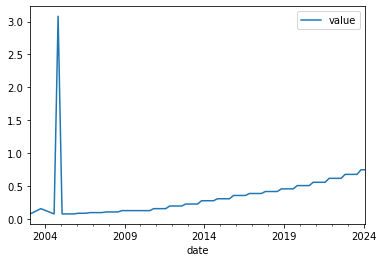

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns



df_to_plot = result_df[(result_df["variable"] == "adjDividend") & (result_df["symbol"] == "MSFT") ][["date", "value"]]

# df_to_plot["date"] = pd.to_datetime(df_to_plot["date"])
df_to_plot = df_to_plot.set_index("date")

# plt.plot(df_to_plot)

df_to_plot.plot()

<div style="background-color:red; height: 3em">

</div>

# Block description: Stocks


<div style="background-color:red; height: 3em">

</div>


In [52]:
# same as above but for stock value

raw_data_stock = []
with open('./data/stock_infos/raw_data_fmp_stock_value.json', "r") as json_file:
    raw_data_stock = json.load(json_file)

raw_data_stock[1].keys()



pd.json_normalize(raw_data_stock[0]["data"]).keys()

df_stock = pd.DataFrame(pd.json_normalize(raw_data_stock[0]["data"]))
df_stock["date"] = pd.to_datetime(df_stock["date"]).dt.to_period('M')
print(df_stock.columns)
df_stock

Index(['date', 'open', 'low', 'high', 'close', 'volume'], dtype='object')


,date,open,low,high,close,volume
0,2024-01,589.51,563.340000,593.540000,591.390000,15412351
1,2023-12,609.24,578.200000,633.890000,596.600000,70816300
2,2023-11,535.00,534.000000,628.600000,611.010000,52919329
3,2023-10,508.24,504.550000,574.400000,532.060000,55824003
4,2023-09,564.80,498.695500,570.239900,509.900000,62927945
...,...,...,...,...,...,...
445,1986-12,0.00,0.363281,0.421875,0.398438,46156800
446,1986-11,0.00,0.339844,0.390625,0.382813,18368000
447,1986-10,0.00,0.269531,0.375000,0.365234,26118400
448,1986-09,0.00,0.222656,0.300781,0.269531,22393600


In [ ]:
from datetime import datetime, timedelta

# Starting date (January 1, 1970)
start_date = datetime(1970, 1, 1)

# Number of months to generate
num_months = (datetime.now() - start_date).days // 30

# Generate datetime objects for each month
months = [start_date + timedelta(days=30 * i) for i in range(num_months)]


In [60]:
result_df = pd.DataFrame()


result_df["date"] = pd.to_datetime(months).to_period('M')



for i, x in enumerate(raw_data_stock):
    
    try:
    # unpivot json
        df = pd.json_normalize(x['data'])
    except:
        print(x)
        input()
        continue
    
    if(df.empty):
        continue
    # show me df if column date does not exist
    if("date" not in df.columns):
        
        continue

    
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dropna()
    # df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

    df['date'] = df['date'].dt.to_period('M')
        
    df_melted = df.melt(id_vars=['date'], value_vars=['date', 'open', 'low', 'high', 'close', 'volume'])
    print(x['symbol'])
    # rename value column to json_response_2['symbol']
    # df_melted = df_melted.rename(columns={"value": x['symbol']})
    # join result df with df_melted on date
    df_melted["symbol"] = x["symbol"]



    if(i == 0):
        result_df = df_melted
        continue
    
    result_df = pd.concat([result_df, df_melted])

    # result_df = result_df.merge(df_melted, how='left', on='date')
    
    



ADBE
T
CSCO
GS
ALXN
AIG
NOC
MSFT
BA
AFL
IBM
PNC
SHW
DG
KR
EQR
PG
COP
C
V
ORCL
ORCL
IT
AAPL
TTWO
EA
NVDA
DAL
TXN
GME
IP
VIAB
VIA
BRK.B
BRK.A
DD
BMY
AES
DIS
MCD
ALB
AMD
AMD
UNM
JPM
ZION
BLK
CVX
LMT
PPG
ETN
XOM
ZBH
ZBH
PFE
MRK
ANSS
JNJ
INTC
AMZN
F
GE
EBAY
GM
CMI
AXP
FB
META
SBUX
APA
XRX
UPS
MMM
IQV
ABT
WMT
IVZ
BBY
PDCO
QCOM
AMAT
CI
MCO
MTD
HBAN
L
BIIB
APH
DE
HAS
CE
MCK
MET
LLY
MDT
USB
WAB
BBT
TFC
TSLA
LUV
DISCB
DISCA
DISCK
CVS
GIS
MSI
APTV
DLPH
TMO
JCI
AON
SPLS
DPZ
GD
MGM
STX
WFC
MSCI
AVY
MA
GRA
HAL
NWL
SWK
BEN
BAX
BBWI
BDX
NKE
PYPL
NLSN
CL
ELV
LIN
LIN
CARR
BKR
BHGE
BWA
ADI
ADP
LDOS
BK
CDNS
KLAC
ADM
TEL
D
COST
VRSN
EQIX
WU
BAC
EIX
GILD
YUM
NLOK
NTAP
WDC
DRI
ICE
CELG
K
IR
PEG
CBS
TGT
MAR
EOG
NSC
ETSY
LB
CERN
DHR
DISH
EL
FITB
FLS
MCHP
HCA
HST


In [61]:
result_df[(result_df["variable"] == "close") & (result_df["symbol"] == "MSFT") ]

,date,variable,value,symbol
1365,2024-01,close,382.880000,MSFT
1366,2023-12,close,376.040000,MSFT
1367,2023-11,close,378.910000,MSFT
1368,2023-10,close,338.110000,MSFT
1369,2023-09,close,315.750000,MSFT
...,...,...,...,...
1815,1986-07,close,0.098958,MSFT
1816,1986-06,close,0.106770,MSFT
1817,1986-05,close,0.121530,MSFT
1818,1986-04,close,0.111980,MSFT


In [62]:
result_df.to_csv("./data/stock_infos/stock_values_per_symbol.csv", index=False)

<AxesSubplot:xlabel='date'>

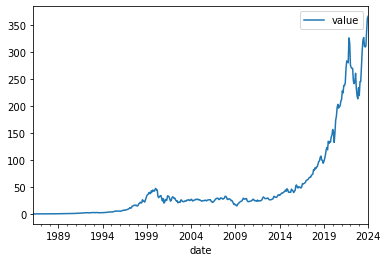

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns



df_to_plot = result_df[(result_df["variable"] == "low") & (result_df["symbol"] == "MSFT") ][["date", "value"]]

# df_to_plot["date"] = pd.to_datetime(df_to_plot["date"])
df_to_plot = df_to_plot.set_index("date")

# plt.plot(df_to_plot)

df_to_plot.plot()